# Regularization

## The choice of our model complexity will either:
$$
\Large \text{increase the bias $\longrightarrow$ decrease the variance}
$$

$$
\Large \text{increase the variance $\longrightarrow$ decrease the bias}
$$

<div align="center">

| Term | High | Low |
| ------| ------- | ---------|
|Variance| Risk of overfitting | Generalization |
|Bias| Risk of underfitting | Fitting |
|Noise| Challenge | Easy |

</div>

#### __Goal__: Find a model complexity that has both low bias (able to fit well) and low variance (able to generalize)

## Weight Decay L1/L2 Regularization

### Idea:

Add a penalty term to the emperical risk:

$$
\Large \text{$argmin_{w}[\frac{1}{N} \sum_{i=1}^{N} L(y_{i}, f(x_{i}; w))] + \alpha \Omega(w)$}
$$

The regularization penalizes high parameter values:

$$
\Large \text{L1: $\Omega(w) = \frac{1}{|w|} \sum_{i=1}^{|w|} |w_{i}|$}
$$

$$
\Large \text{L2: $\Omega(w) = \frac{1}{|w|} \sum_{i=1}^{|w|} w_{i}^2$}
$$

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [134]:
np.random.seed(42)

In [135]:
# Target Function
def f(x: float) -> float:
    return -6 + 5*x + 5 * x**2 - 5 * x ** 3 + x ** 4

In [136]:
# Parameters
N = 60
noise = np.random.normal(0, 1.4, N)

# Creating a noisy dataset
X = np.linspace(-1.2, 3.5, N)
y  = f(X) + noise
X_continues = np.linspace(-1.2, 3.5, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

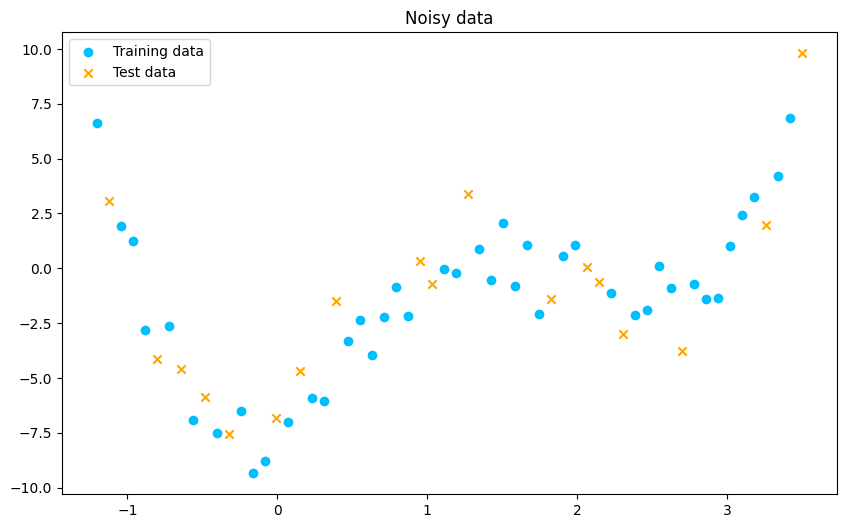

In [137]:
plt.figure(figsize=(10, 6))
plt.title('Noisy data')
plt.scatter(X_train, y_train, color='deepskyblue', label='Training data')
plt.scatter(X_test, y_test, color='orange', marker='x', label='Test data')
plt.legend()
plt.show()

In [138]:
class PolynomialRegression:
    def __init__(self,  degree: int) -> None:
        self.w = np.random.rand(degree+1)
        self.feature_transformation = PolynomialFeatures(degree=degree)

    def L2(self, w: np.array) -> np.array:
        return np.sum(w**2) / len(w)

    def fit(self, X: np.array, y: np.array, LR: float, alpha: float, ITER: int, verbose:bool=True) -> None:
        X_lift = self.feature_transformation.fit_transform(X)
        for iter in range(ITER):
            y_hat = np.dot(X_lift, self.w)
            J_w = -2 * np.dot(y - y_hat, X_lift)# + (2 * alpha * (1 / len(self.w)))
            self.w = self.w - LR * J_w

            if verbose and iter % 1000 == 0:
                mse = np.mean((y - y_hat) ** 2)
                print(f"Iteration: {iter}\tMSE: {mse}")

    def predict(self, X: np.array) -> np.array:
        X_lift = self.feature_transformation.fit_transform(X)
        return np.dot(X_lift, self.w)

In [139]:
PolynomialModel = PolynomialRegression(18)
PolynomialModel.fit(X_train.reshape(-1, 1), y_train, LR=1e-3, alpha=1e-9, ITER=100000, verbose=True)

Iteration: 0	MSE: 1.582800259348794e+17
Iteration: 1000	MSE: nan
Iteration: 2000	MSE: nan
Iteration: 3000	MSE: nan
Iteration: 4000	MSE: nan
Iteration: 5000	MSE: nan
Iteration: 6000	MSE: nan
Iteration: 7000	MSE: nan
Iteration: 8000	MSE: nan
Iteration: 9000	MSE: nan
Iteration: 10000	MSE: nan
Iteration: 11000	MSE: nan
Iteration: 12000	MSE: nan
Iteration: 13000	MSE: nan
Iteration: 14000	MSE: nan
Iteration: 15000	MSE: nan
Iteration: 16000	MSE: nan
Iteration: 17000	MSE: nan
Iteration: 18000	MSE: nan
Iteration: 19000	MSE: nan
Iteration: 20000	MSE: nan
Iteration: 21000	MSE: nan
Iteration: 22000	MSE: nan
Iteration: 23000	MSE: nan
Iteration: 24000	MSE: nan
Iteration: 25000	MSE: nan
Iteration: 26000	MSE: nan
Iteration: 27000	MSE: nan
Iteration: 28000	MSE: nan
Iteration: 29000	MSE: nan
Iteration: 30000	MSE: nan
Iteration: 31000	MSE: nan
Iteration: 32000	MSE: nan
Iteration: 33000	MSE: nan
Iteration: 34000	MSE: nan
Iteration: 35000	MSE: nan
Iteration: 36000	MSE: nan
Iteration: 37000	MSE: nan
Iterati

In [140]:
from polynomial_regression import PolynomialRegression as PR
m2 = PR(16)
m2.fit(X_train.reshape(-1, 1), y_train)

In [141]:
print(PolynomialModel.w)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]


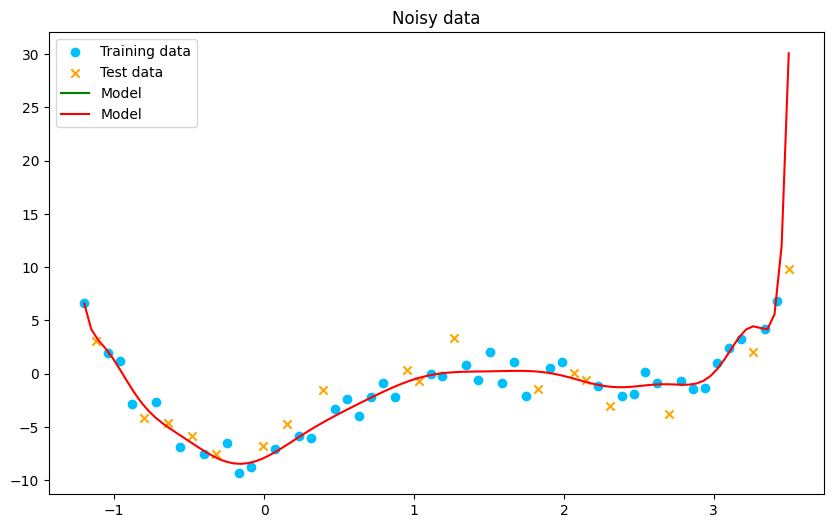

In [142]:
plt.figure(figsize=(10, 6))
plt.title('Noisy data')
plt.scatter(X_train, y_train, color='deepskyblue', label='Training data')
plt.scatter(X_test, y_test, color='orange', marker='x', label='Test data')
plt.plot(X_continues, PolynomialModel.predict(X_continues.reshape(-1, 1)), label='Model', color='green')
plt.plot(X_continues, m2.predict(X_continues.reshape(-1, 1)), label='Model', color='red')
plt.legend()
plt.show()

In [143]:
y_hat = PolynomialModel.predict(X_test.reshape(-1, 1))
mse = np.mean((y_test-y_hat) ** 2)
print(mse)

nan


In [144]:
test = PolynomialFeatures(4)

X = np.array([[1], [2]])
print(test.fit_transform(X))

[[ 1.  1.  1.  1.  1.]
 [ 1.  2.  4.  8. 16.]]
